# Capítulo 2

## Células

pip install geopandas
pip install matplotlib

In [3]:
import geopandas as gpd


In [4]:
gdf = gpd.read_file("../data/vectorial/amazonas_grid_30km.zip")
gdf.head()

,id,left,top,right,bottom,geometry
0,2572.0,4.462975e+06,9.025259e+06,4.492975e+06,8.995259e+06,"POLYGON ((4462974.706 9025259.449, 4492974.706..."
1,2569.0,4.462975e+06,9.115259e+06,4.492975e+06,9.085259e+06,"POLYGON ((4462974.706 9115259.449, 4492974.706..."
2,2568.0,4.462975e+06,9.145259e+06,4.492975e+06,9.115259e+06,"POLYGON ((4462974.706 9145259.449, 4492974.706..."
3,2571.0,4.462975e+06,9.055259e+06,4.492975e+06,9.025259e+06,"POLYGON ((4462974.706 9055259.449, 4492974.706..."
4,2570.0,4.462975e+06,9.085259e+06,4.492975e+06,9.055259e+06,"POLYGON ((4462974.706 9085259.449, 4492974.706..."


<Axes: >

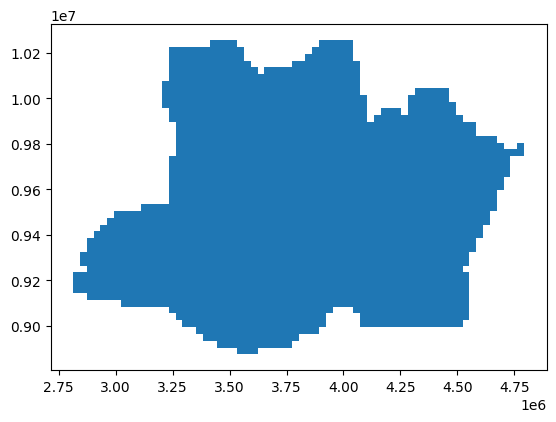

In [6]:
gdf.plot()

pip install rioxarray

In [8]:
import rioxarray as rxr

In [10]:
surface = rxr.open_rasterio("zip://../data/raster/amazonas_veg.zip")
surface

<xarray.DataArray (band: 1, y: 160, x: 229)> Size: 293kB
[36640 values with dtype=float64]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB 2.824e+06 2.833e+06 ... 4.749e+06 4.758e+06
  * y            (y) float64 1kB 1.025e+07 1.024e+07 ... 8.909e+06 8.901e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     9.969209968386869e+36
    scale_factor:   1.0
    add_offset:     0.0

In [11]:
import matplotlib.pyplot as plt


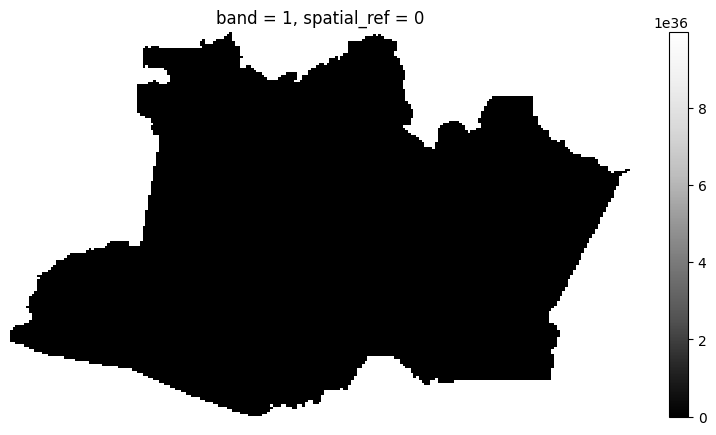

In [12]:
f, ax = plt.subplots(figsize=(10, 5))
surface.plot(cmap="Greys_r",               ax=ax)

ax.set_axis_off()
plt.show()

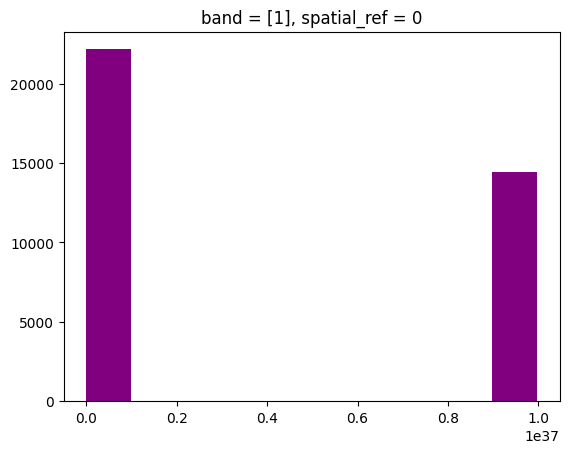

In [13]:
surface.plot.hist(color="purple")
plt.show()

In [15]:
import numpy as np

In [16]:
print("the minimum raster value is: ", np.nanmin(surface.values))
print("the maximum raster value is: ", np.nanmax(surface.values))

the minimum raster value is:  0.0
the maximum raster value is:  9.969209968386869e+36


In [17]:
surface = rxr.open_rasterio("zip://../data/raster/amazonas_veg.zip", masked=True).squeeze()
surface

<xarray.DataArray (y: 160, x: 229)> Size: 293kB
[36640 values with dtype=float64]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 2kB 2.824e+06 2.833e+06 ... 4.749e+06 4.758e+06
  * y            (y) float64 1kB 1.025e+07 1.024e+07 ... 8.909e+06 8.901e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [18]:
print("the minimum raster value is: ", np.nanmin(surface.values))
print("the maximum raster value is: ", np.nanmax(surface.values))

the minimum raster value is:  0.0
the maximum raster value is:  1.0


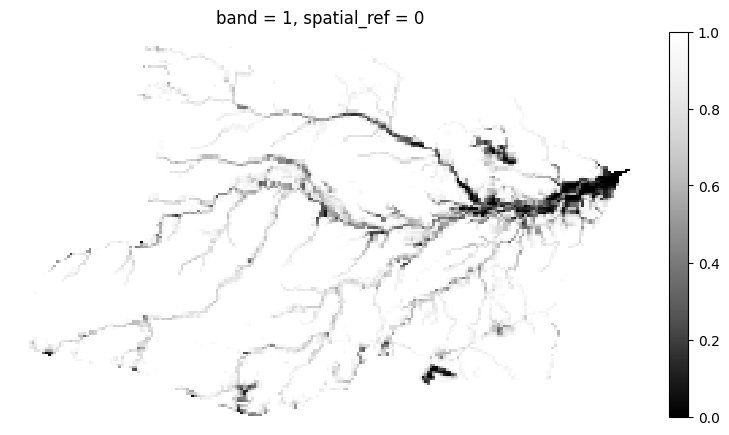

In [19]:
f, ax = plt.subplots(figsize=(10, 5))
surface.plot(cmap="Greys_r",               ax=ax)

ax.set_axis_off()
plt.show()

pip install rasterstats

In [20]:
from rasterstats import zonal_stats

In [21]:
import time

inicio = time.time()
stats = zonal_stats (gdf, "zip://../data/raster/amazonas_veg.zip", stats="mean")
fim = time.time()

# Calcula e imprime o tempo de execução
tempo_execucao = fim - inicio
print(f'Tempo de execução: {tempo_execucao} segundos')

Tempo de execução: 12.38783574104309 segundos


In [22]:
gdf["mean_value"] = [feature["mean"] for feature in stats]

<Axes: >

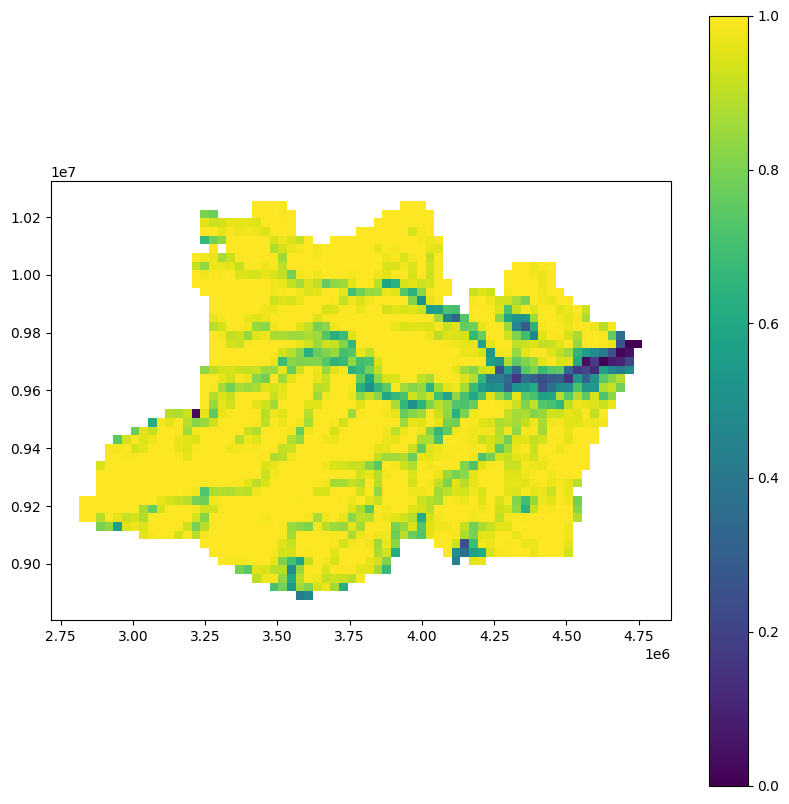

In [23]:
gdf.plot(column='mean_value', cmap='viridis', legend=True, figsize=(10, 10))